In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load Data

In [5]:
data_folder_path = './Batch size and processes count/'
file_name = 'Batch size and processes count experiment.csv'
other_file_name = 'Batch size and processes count experiment_other-data.csv'
times_file_name = 'Batch size and processes count experiment times.csv'
db_times_file_name = 'Batch size and processes count experiment (DB) times.csv'
db_other_file_name = 'Batch size and processes count experiment (DB)_other-data.csv'

# First run (collected results and then stored into CSV on experiment end)
data = pd.read_csv(data_folder_path + file_name)
other_data = pd.read_csv(data_folder_path + other_file_name)
data_times = pd.read_csv(data_folder_path + times_file_name)

# Second run (results from a task stored to DB server as soon as that task was finished)
db_data_times = pd.read_csv(data_folder_path + db_times_file_name)
db_other_data = pd.read_csv(data_folder_path + db_other_file_name)

In [8]:
data

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,parameters_id,batch_size,num_processes
0,1,1,0.015641,3,3,Beginner (9x9),11x11,True,"(3, 3)",True,1,1,4
1,1,1,0.031264,4,4,Beginner (9x9),11x11,True,"(3, 3)",True,1,1,4
2,1,1,0.140815,6,6,Intermediate (16x16),18x18,True,"(3, 3)",True,2,1,4
3,0,0,0.031173,4,3,Beginner (9x9),11x11,True,"(3, 3)",True,1,1,4
4,1,1,0.343858,11,11,Intermediate (16x16),18x18,True,"(3, 3)",True,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310855,160,67,2397.057697,9708,8653,Expert (16x30),18x32,True,"(3, 3)",True,3,500,24
310856,181,64,2638.821452,9787,8692,Expert (16x30),18x32,True,"(3, 3)",True,3,500,24
310857,167,55,2622.277961,9598,8439,Expert (16x30),18x32,True,"(3, 3)",True,3,500,24
310858,193,80,2721.248593,9859,8795,Expert (16x30),18x32,True,"(3, 3)",True,3,500,24


In [9]:
print(other_data.shape)
other_data

(1, 8)


,sample_size,use_num_mines_constraint,first_click_pos,num_games,verbose,visualise,agent_seed,run_seed
0,NaN,True,"(3, 3)",7500,False,False,20,2020


In [11]:
db_other_data

,sample_size,use_num_mines_constraint,first_click_pos,num_games,verbose,visualise,agent_seed,run_seed
0,NaN,True,NaN,3000,False,False,20,2020


In [10]:
data_times

,batch_size,num_processes,time_elapsed
0,1,4,4086.847789
1,1,6,2867.761372
2,1,8,2781.231754
3,1,10,2704.385364
4,1,12,2579.134883
...,...,...,...
61,500,16,2836.750435
62,500,18,2771.602739
63,500,20,2733.289005
64,500,22,2772.687915


In [12]:
db_data_times

,batch_size,num_processes,time_elapsed
0,1,8,1165.243609
1,1,10,1120.615284
2,1,12,1060.085773
3,1,14,1055.671265
4,5,8,1137.698439
5,5,10,1116.550812
6,5,12,1047.407666
7,5,14,1043.334007
8,25,8,1160.480903
9,25,10,1107.333956


# Analyse

In [15]:
x = sum(data_times['time_elapsed'])
hrs = int(x // (60 ** 2))
mins = int(x % (60 ** 2) // 60)
num_batch_processes_combos = data_times.shape[0]
num_solver_param_combos = 3
print(f"experiment took {int(x)}s = {hrs}hrs {mins}m")
print(f"Number of batch size & num processes combos: {num_batch_processes_combos}")
print(f"Number of total variable combinations: {num_batch_processes_combos * num_solver_param_combos}")
print(f"Num games: {other_data['num_games'][0]}")

experiment took 190398s = 52hrs 53m
Number of batch size & num processes combos: 66
Number of total variable combinations: 198
Num games: 7500


In [18]:
x = sum(db_data_times['time_elapsed'])
hrs = int(x // (60 ** 2))
mins = int(x % (60 ** 2) // 60)
num_batch_processes_combos = db_data_times.shape[0]
num_solver_param_combos = 3
print(f"experiment (run 2 - DB version) took {int(x)}s = {hrs}hrs {mins}m")
print(f"Number of batch size & num processes combos: {num_batch_processes_combos}")
print(f"Number of total variable combinations: {num_batch_processes_combos * num_solver_param_combos}")
print(f"Num games: {db_other_data['num_games'][0]}")

experiment (run 2 - DB version) took 17750s = 4hrs 55m
Number of batch size & num processes combos: 16
Number of total variable combinations: 48
Num games: 3000


In [33]:
num_games = other_data['num_games'][0]
data_times['avg_per_game'] = data_times['time_elapsed'] / num_games
data_times

,batch_size,num_processes,time_elapsed,run,avg_per_game
0,1,4,4086.847789,1,0.544913
1,1,6,2867.761372,1,0.382368
2,1,8,2781.231754,1,0.370831
3,1,10,2704.385364,1,0.360585
4,1,12,2579.134883,1,0.343885
...,...,...,...,...,...
61,500,16,2836.750435,1,0.378233
62,500,18,2771.602739,1,0.369547
63,500,20,2733.289005,1,0.364439
64,500,22,2772.687915,1,0.369692


In [34]:
db_num_games = db_other_data['num_games'][0]
db_data_times['avg_per_game'] = db_data_times['time_elapsed'] / db_num_games
db_data_times

,batch_size,num_processes,time_elapsed,avg_per_game,run
0,1,8,1165.243609,0.388415,2
1,1,10,1120.615284,0.373538,2
2,1,12,1060.085773,0.353362,2
3,1,14,1055.671265,0.351890,2
4,5,8,1137.698439,0.379233,2
5,5,10,1116.550812,0.372184,2
6,5,12,1047.407666,0.349136,2
7,5,14,1043.334007,0.347778,2
8,25,8,1160.480903,0.386827,2
9,25,10,1107.333956,0.369111,2


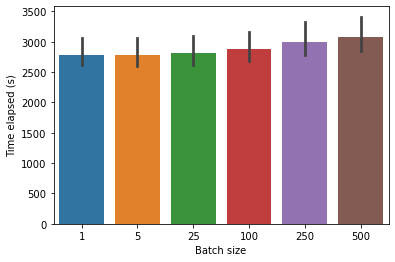

In [7]:
ax = sns.barplot(x='batch_size', y='time_elapsed', data=data_times)
ax.set_xlabel('Batch size')
ax.set_ylabel('Time elapsed (s)')
plt.show()

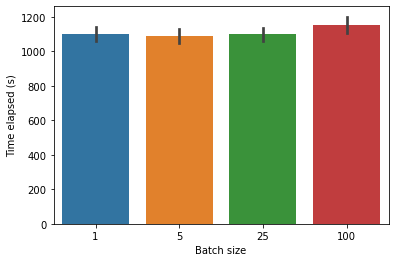

In [20]:
# DB run
ax = sns.barplot(x='batch_size', y='time_elapsed', data=db_data_times)
ax.set_xlabel('Batch size')
ax.set_ylabel('Time elapsed (s)')
plt.show()

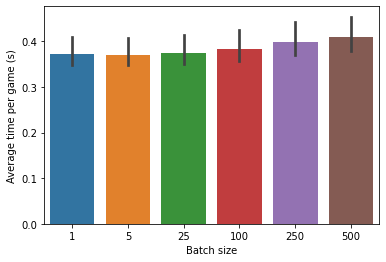

In [8]:
ax = sns.barplot(x='batch_size', y='avg_per_game', data=data_times)
ax.set_xlabel('Batch size')
ax.set_ylabel('Average time per game (s)')
plt.show()

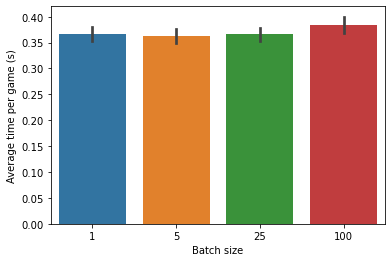

In [21]:
# DB run
ax = sns.barplot(x='batch_size', y='avg_per_game', data=db_data_times)
ax.set_xlabel('Batch size')
ax.set_ylabel('Average time per game (s)')
plt.show()

In [35]:
df1 = pd.DataFrame(data_times)
df2 = pd.DataFrame(db_data_times)
df1['run'] = 1
df2['run'] = 2
df = pd.concat([df1, df2])
df

,batch_size,num_processes,time_elapsed,run,avg_per_game
0,1,4,4086.847789,1,0.544913
1,1,6,2867.761372,1,0.382368
2,1,8,2781.231754,1,0.370831
3,1,10,2704.385364,1,0.360585
4,1,12,2579.134883,1,0.343885
...,...,...,...,...,...
11,25,14,1060.187922,2,0.353396
12,100,8,1224.043434,2,0.408014
13,100,10,1175.349376,2,0.391783
14,100,12,1105.459488,2,0.368486


In [48]:
# Filter to match batch size & #processes between runs
df_reduced = df[(df['num_processes'] <= 12) & (df['num_processes'] >= 8) & (df['batch_size'] <= 100)]
df_reduced

,batch_size,num_processes,time_elapsed,run,avg_per_game
2,1,8,2781.231754,1,0.370831
3,1,10,2704.385364,1,0.360585
4,1,12,2579.134883,1,0.343885
7,5,8,2777.247754,1,0.370300
8,5,10,2707.890877,1,0.361052
9,5,12,2581.083918,1,0.344145
12,25,8,2819.985146,1,0.375998
13,25,10,2714.310710,1,0.361908
14,25,12,2596.312738,1,0.346175
17,100,8,2884.937277,1,0.384658


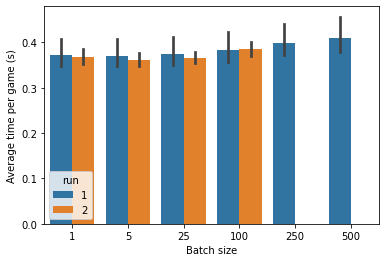

In [49]:
# Comparing with ALL batch v #processes pairs used in each run
ax = sns.barplot(x='batch_size', y='avg_per_game', hue='run', data=df)
ax.set_xlabel('Batch size')
ax.set_ylabel('Average time per game (s)')
plt.show()

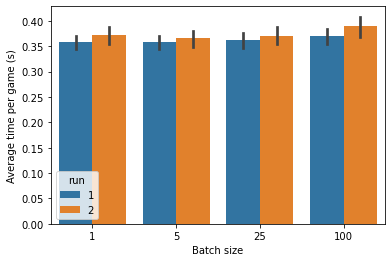

In [50]:
# Comparing with just the batch v process pairs that were used in both runs
ax = sns.barplot(x='batch_size', y='avg_per_game', hue='run', data=df_reduced)
ax.set_xlabel('Batch size')
ax.set_ylabel('Average time per game (s)')
plt.show()

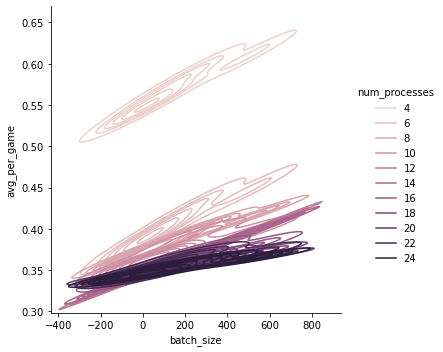

In [23]:
sns.displot(data=data_times, x="batch_size", y="avg_per_game", hue='num_processes', kind='kde')

/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipp

/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/kel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipp

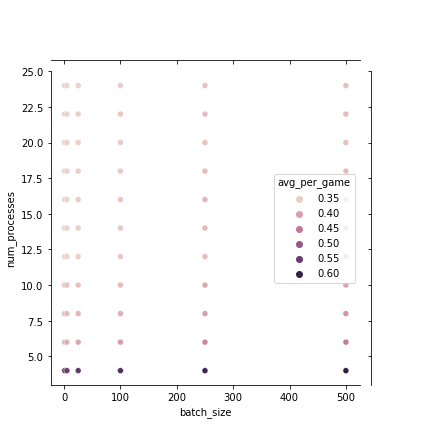

In [28]:
ax = sns.jointplot(x='batch_size', hue='avg_per_game', y='num_processes', data=data_times)
# ax.set_xlabel('Batch size')
# ax.set_ylabel('Average time per game (s)')
plt.show()

In [32]:
pivot_times_2D = data_times.pivot_table(index='num_processes', columns='batch_size', values='avg_per_game')
pivot_times_2D

batch_size,1,5,25,100,250,500
num_processes,,,,,,
4,0.544913,0.545968,0.552701,0.568491,0.592506,0.609810
6,0.382368,0.384912,0.393228,0.404454,0.430270,0.447312
8,0.370831,0.370300,0.375998,0.384658,0.400074,0.414796
10,0.360585,0.361052,0.361908,0.371526,0.393215,0.396865
12,0.343885,0.344145,0.346175,0.355197,0.367348,0.396646
14,0.347056,0.345082,0.347602,0.356423,0.372940,0.393981
16,0.347917,0.343821,0.350147,0.357871,0.373371,0.378233
18,0.347641,0.344107,0.351114,0.354344,0.365739,0.369547
20,0.347844,0.346574,0.345993,0.352352,0.360550,0.364439


<AxesSubplot:xlabel='batch_size', ylabel='num_processes'>

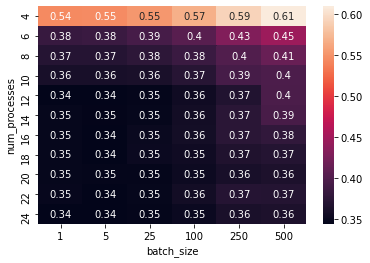

In [35]:
sns.heatmap(pivot_times_2D, annot=True)

In [36]:
pivot_total_times_2D = data_times.pivot_table(index='num_processes', columns='batch_size', values='time_elapsed')
pivot_total_times_2D

batch_size,1,5,25,100,250,500
num_processes,,,,,,
4,4086.847789,4094.758360,4145.260062,4263.679093,4443.795885,4573.578502
6,2867.761372,2886.841500,2949.209615,3033.403826,3227.025383,3354.836933
8,2781.231754,2777.247754,2819.985146,2884.937277,3000.556003,3110.973711
10,2704.385364,2707.890877,2714.310710,2786.442799,2949.108995,2976.490765
12,2579.134883,2581.083918,2596.312738,2663.977365,2755.108650,2974.847473
14,2602.918913,2588.112355,2607.018106,2673.172077,2797.051322,2954.860934
16,2609.380330,2578.656761,2626.103109,2684.032901,2800.284130,2836.750435
18,2607.304019,2580.806046,2633.356230,2657.583636,2743.045501,2771.602739
20,2608.833514,2599.306440,2594.946529,2642.640398,2704.126226,2733.289005


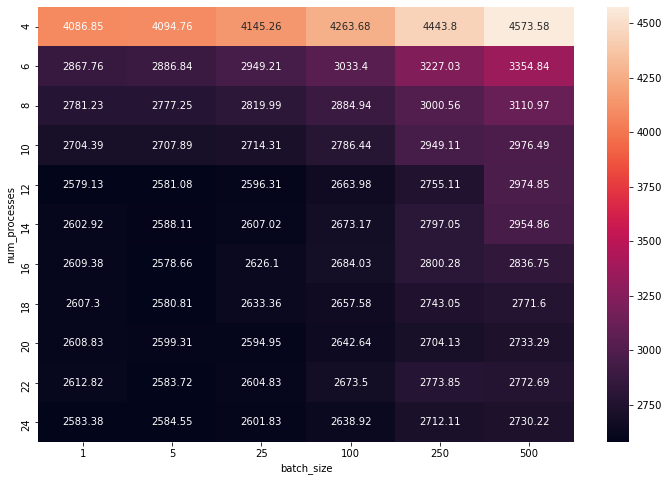

In [41]:
ax = sns.heatmap(pivot_total_times_2D, annot=True, fmt='g')
fig = plt.gcf()
fig.set_size_inches(12, 8)

In [51]:
df = data_times[(data_times['num_processes'] >= 12) & (data_times['batch_size'] <= 100)]
pivot_total_times_2D_reduced = df.pivot_table(index='num_processes', columns='batch_size', values='time_elapsed')
pivot_total_times_2D_reduced

batch_size,1,5,25,100
num_processes,,,,
12,2579.134883,2581.083918,2596.312738,2663.977365
14,2602.918913,2588.112355,2607.018106,2673.172077
16,2609.380330,2578.656761,2626.103109,2684.032901
18,2607.304019,2580.806046,2633.356230,2657.583636
20,2608.833514,2599.306440,2594.946529,2642.640398
22,2612.819046,2583.717922,2604.826679,2673.504588
24,2583.377279,2584.545184,2601.831335,2638.922295


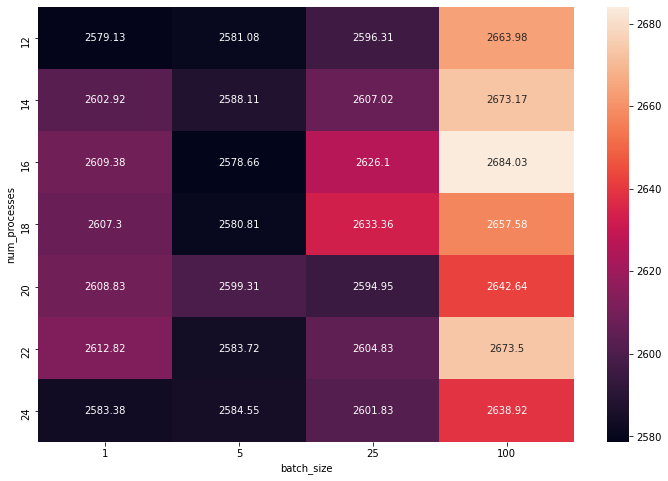

In [52]:
ax = sns.heatmap(pivot_total_times_2D_reduced, annot=True, fmt='g')
fig = plt.gcf()
fig.set_size_inches(12, 8)

In [57]:
df = pd.DataFrame(data_times)
smallest_time_elapsed = min(df['time_elapsed'])
df['relative_time'] = df['time_elapsed'] / smallest_time_elapsed

print(smallest_time_elapsed)
df

2578.6567606925964


,batch_size,num_processes,time_elapsed,avg_per_game,relative_time
0,1,4,4086.847789,0.544913,1.584875
1,1,6,2867.761372,0.382368,1.112114
2,1,8,2781.231754,0.370831,1.078558
3,1,10,2704.385364,0.360585,1.048757
4,1,12,2579.134883,0.343885,1.000185
...,...,...,...,...,...
61,500,16,2836.750435,0.378233,1.100088
62,500,18,2771.602739,0.369547,1.074824
63,500,20,2733.289005,0.364439,1.059966
64,500,22,2772.687915,0.369692,1.075245


In [68]:
df_reduced = df[(data_times['num_processes'] >= 6) & (data_times['batch_size'] <= 25)]

pivot_total_times_2D_relative = df_reduced.pivot_table(index='num_processes', columns='batch_size', values='relative_time')
pivot_total_times_2D_relative

batch_size,1,5,25
num_processes,,,
6,1.112114,1.119514,1.143700
8,1.078558,1.077013,1.093587
10,1.048757,1.050117,1.052606
12,1.000185,1.000941,1.006847
14,1.009409,1.003667,1.010998
16,1.011915,1.000000,1.018400
18,1.011109,1.000833,1.021212
20,1.011703,1.008008,1.006317
22,1.013248,1.001963,1.010149


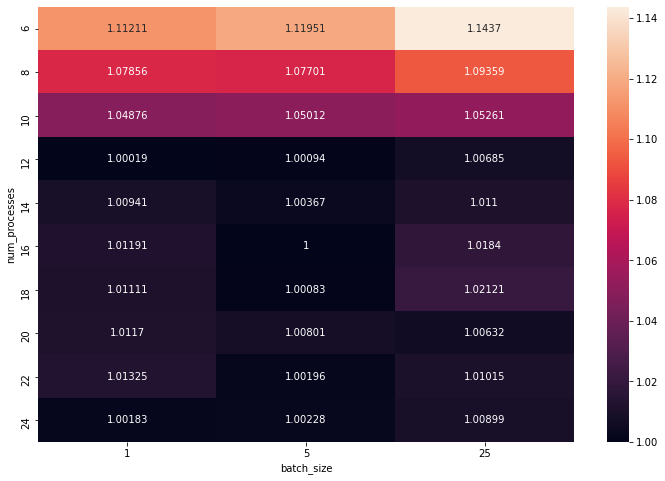

In [69]:
sns.heatmap(pivot_total_times_2D_relative, annot=True, fmt='g')
fig = plt.gcf()
fig.set_size_inches(12, 8)

### DB run analysis

In [26]:
db_pivot_total_times_2D = db_data_times.pivot_table(index='num_processes', columns='batch_size', values='time_elapsed')
db_pivot_total_times_2D

batch_size,1,5,25,100
num_processes,,,,
8,1165.243609,1137.698439,1160.480903,1224.043434
10,1120.615284,1116.550812,1107.333956,1175.349376
12,1060.085773,1047.407666,1062.169725,1105.459488
14,1055.671265,1043.334007,1060.187922,1108.987392


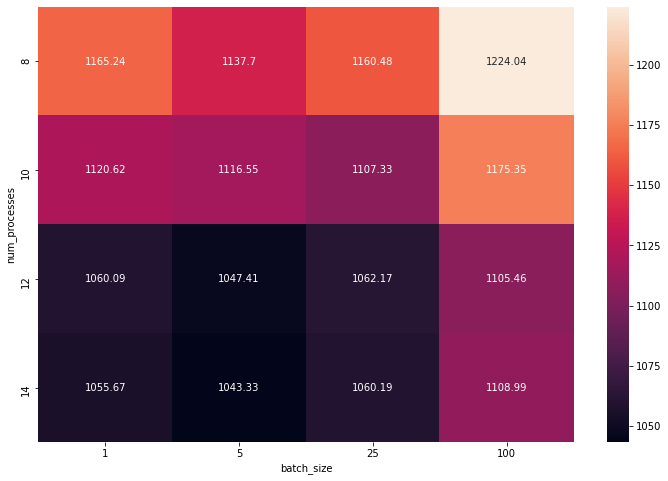

In [27]:
ax = sns.heatmap(db_pivot_total_times_2D, annot=True, fmt='g')
fig = plt.gcf()
fig.set_size_inches(12, 8)